In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error




In [18]:
# Load the dataset
df = pd.read_csv("ITSM_data.csv")



C:\Users\dutoite1\AppData\Local\Temp\ipykernel_52292\3378968209.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ITSM_data.csv")


In [19]:
# Convert date columns to datetime format
df['Open_Time'] = pd.to_datetime(df['Open_Time'], dayfirst=True, errors='coerce')
df['Resolved_Time'] = pd.to_datetime(df['Resolved_Time'],dayfirst=True, errors='coerce')
df['Close_Time'] = pd.to_datetime(df['Close_Time'], dayfirst=True, errors='coerce')





In [20]:
# Extract useful features from date columns
df['Open_Hour'] = df['Open_Time'].dt.hour
df['Open_DayOfWeek'] = df['Open_Time'].dt.dayofweek
df['Resolved_Hour'] = df['Resolved_Time'].dt.hour
df['Resolved_DayOfWeek'] = df['Resolved_Time'].dt.dayofweek
df['Close_Hour'] = df['Close_Time'].dt.hour
df['Close_DayOfWeek'] = df['Close_Time'].dt.dayofweek



In [21]:
# Calculate response and resolution times in hours
df['Response_Time'] = (df['Resolved_Time'] - df['Open_Time']).dt.total_seconds() / 3600.0
df['Resolution_Time'] = (df['Close_Time'] - df['Open_Time']).dt.total_seconds() / 3600.0



In [22]:
# Drop rows with missing values
df.dropna(inplace=True)

# Convert categorical variables to numerical format using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Incident_ID']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

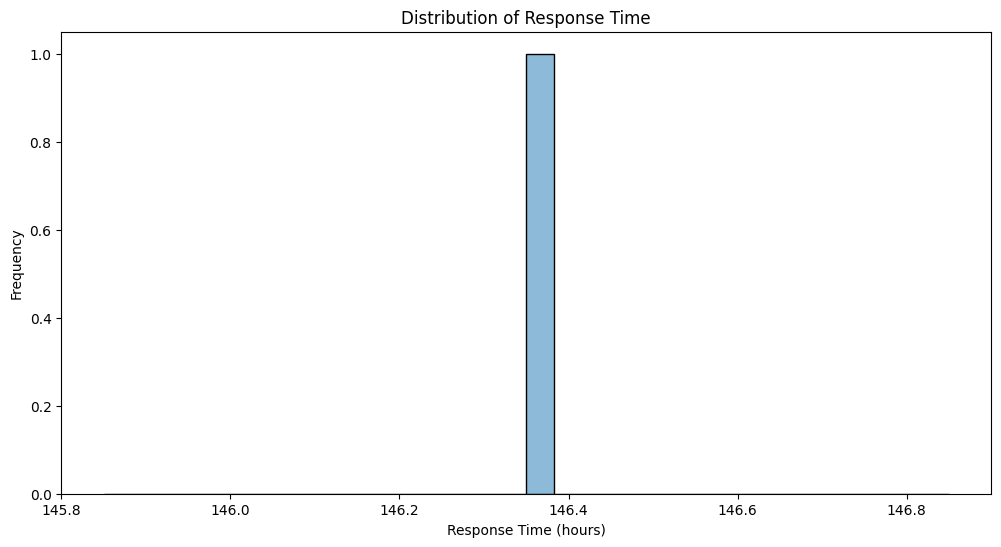

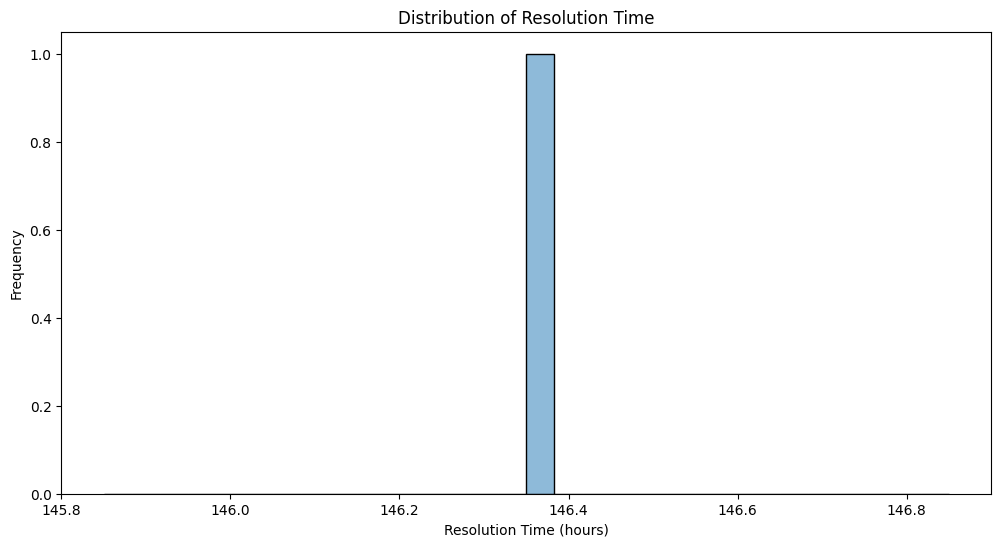

In [24]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(df['Response_Time'], bins=30, kde=True)
plt.title('Distribution of Response Time')
plt.xlabel('Response Time (hours)')
plt.ylabel('Frequency')
plt.show()



plt.figure(figsize=(12, 6))
sns.histplot(df['Resolution_Time'], bins=30, kde=True)
plt.title('Distribution of Resolution Time')
plt.xlabel('Resolution Time (hours)')
plt.ylabel('Frequency')
plt.show()



C:\Users\dutoite1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\dutoite1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


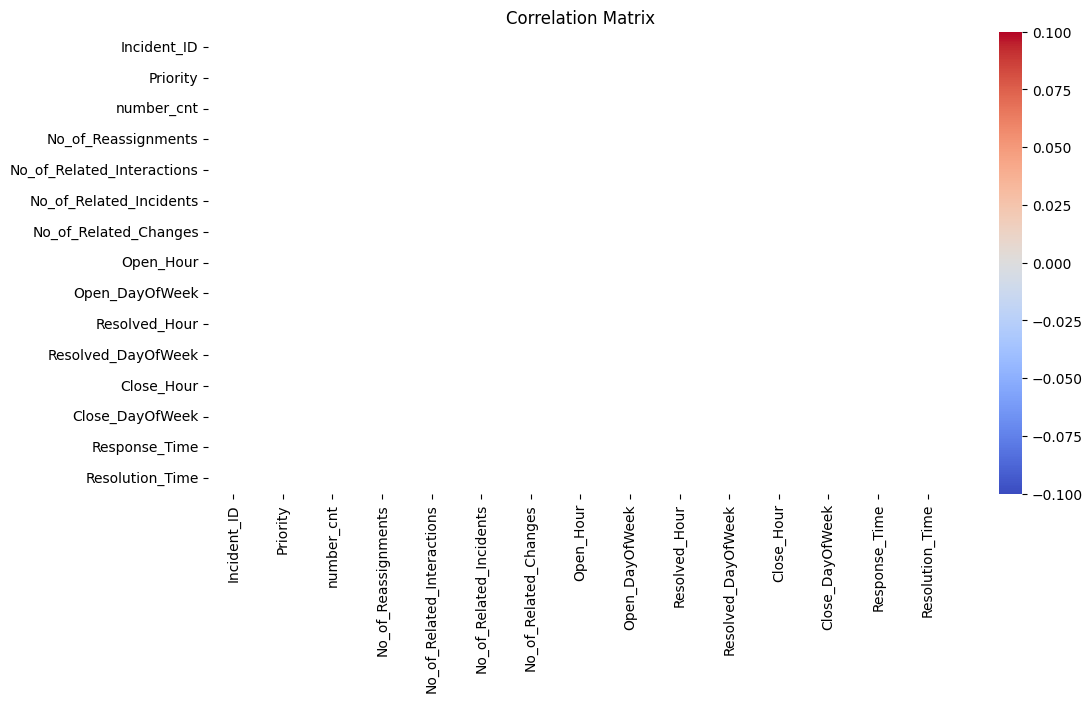

In [26]:
# Correlation matrix

numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

In [28]:
# Prepare data for predictive analytics
X = df[['Open_Hour', 'Open_DayOfWeek', 'Resolved_Hour', 'Resolved_DayOfWeek', 'Close_Hour', 'Close_DayOfWeek']]
y_response = df['Response_Time']
y_resolution = df['Resolution_Time']


In [34]:


X_train_response, X_test_response, y_train_response, y_test_response = train_test_split(X, y_response, test_size=0.2, random_state=42)


ValueError: With n_samples=1, test_size=0.8 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
# Split the data into training and testing sets for response time prediction
X_train_response, X_test_response, y_train_response, y_test_response = train_test_split(X, y_response, test_size=0.2, random_state=42)

# Split the data into training and testing sets for resolution time prediction
X_train_resolution, X_test_resolution, y_train_resolution, y_test_resolution = train_test_split(X, y_resolution, test_size=0.2, random_state=42)

In [30]:



# Train and evaluate Linear Regression model for response time prediction
lr_model_response = LinearRegression()
lr_model_response.fit(X_train_response, y_train_response)
y_pred_response_lr = lr_model_response.predict(X_test_response)
mae_response_lr = mean_absolute_error(y_test_response, y_pred_response_lr)
rmse_response_lr = np.sqrt(mean_squared_error(y_test_response, y_pred_response_lr))

print(f"Linear Regression - Response Time Prediction: MAE={mae_response_lr}, RMSE={rmse_response_lr}")

NameError: name 'X_train_response' is not defined

In [ ]:



# Train and evaluate Decision Tree model for response time prediction
dt_model_response = DecisionTreeRegressor(random_state=42)
dt_model_response.fit(X_train_response, y_train_response)
y_pred_response_dt = dt_model_response.predict(X_test_response)
mae_response_dt = mean_absolute_error(y_test_response, y_pred_response_dt)
rmse_response_dt = np.sqrt(mean_squared_error(y_test_response, y_pred_response_dt))

print(f"Decision Tree - Response Time Prediction: MAE={mae_response_dt}, RMSE={rmse_response_dt}")

# Train and evaluate Linear Regression model for resolution time prediction
lr_model_resolution = LinearRegression()
lr_model_resolution.fit(X_train_resolution, y_train_resolution)
y_pred_resolution_lr = lr_model_resolution.predict(X_test_resolution)
mae_resolution_lr = mean_absolute_error(y_test_resolution, y_pred_resolution_lr)
rmse_resolution_lr = np.sqrt(mean_squared_error(y_test_resolution, y_pred_resolution_lr))

print(f"Linear Regression - Resolution Time Prediction: MAE={mae_resolution_lr}, RMSE={rmse_resolution_lr}")

# Train and evaluate Decision Tree model for resolution time prediction
dt_model_resolution = DecisionTreeRegressor(random_state=42)
dt_model_resolution.fit(X_train_resolution, y_train_resolution)
y_pred_resolution_dt = dt_model_resolution.predict(X_test_resolution)
mae_resolution_dt = mean_absolute_error(y_test_resolution, y_pred_resolution_dt)
rmse_resolution_dt = np.sqrt(mean_squared_error(y_test_resolution, y_pred_resolution_dt))

print(f"Decision Tree - Resolution Time Prediction: MAE={mae_resolution_dt}, RMSE={rmse_resolution_dt}")